Seaborn plots based on a variety of real-world data sets, including exploring how air pollution in a city changes through the day and looking at what young people like to do in their free time. 

Our most Goal is to learn when to use each type of visualization in order to most effectively extract and communicate insights using data.


# CHAPTER1:  Introduction to Seaborn

developed in order to make it easy to create the most common types of plots, built to automatically handle a lot of complexity behind the scenes, works extremely well with pandas data structures, built on top of Matplotlib


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Dataset Exploration
contains information about 227 countries. This dataset has lots of interesting information on each country, such as the country's birth rates, death rates, and its gross domestic product (GDP). GDP is the value of all the goods and services produced in a year, expressed as dollars per person.

In [2]:
countries_gpd = pd.read_csv('./data/countries-of-the-world.csv')
countries_gpd.head(1)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"


In [3]:
gdp = list(pd.read_csv('./data/countries-of-the-world.csv')["GDP ($ per capita)"])
gdp[:5]

[700.0, 4500.0, 6000.0, 8000.0, 19000.0]

In [4]:
phones = list(countries_gpd["Phones (per 1000)"])
phones[:5]

['3,2', '71,2', '78,1', '259,5', '497,2']

In [5]:
percent_literate = list(countries_gpd["Literacy (%)"])
percent_literate[:5]

['36,0', '86,5', '70,0', '97,0', '100,0']

<AxesSubplot:>

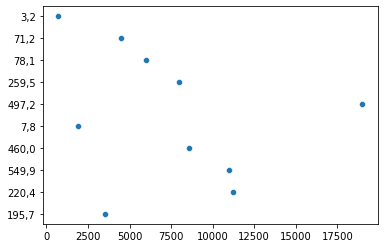

In [6]:
sns.scatterplot(x=gdp[:10], y=phones[:10])

<AxesSubplot:>

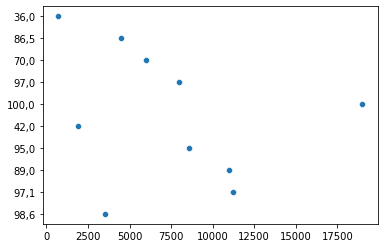

In [7]:
sns.scatterplot(x=gdp[:10], y=percent_literate[:10])

In [8]:
regions = list(countries_gpd["Region"])
regions[:1]

['ASIA (EX. NEAR EAST)         ']

<AxesSubplot:xlabel='count'>

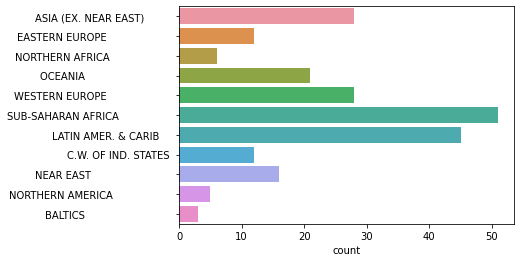

In [9]:
sns.countplot(y=regions)

### Seaborn works great with pandas DataFrames
But, only if the DataFrame is "tidy". <br>
"Tidy data" means that each observation has its own row and each variable has its own column.

In [10]:
spider_survey = pd.read_csv('./data/young-people-survey-responses.csv')
spider_survey.head(1)

,Unnamed: 0,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Loneliness,Parents' advice,Internet usage,Finances,Age,Siblings,Gender,Village - town
0,0,5.0,1.0,5.0,1.0,3.0,4.0,1.0,3.0,4.0,few hours a day,3.0,20.0,1.0,female,village


### Our primary question here is: how many young people surveyed report being scared of spiders? Survey participants were asked to agree or disagree with the statement "I am afraid of spiders". Responses vary from 1 to 5, where 1 is "Strongly disagree" and 5 is "Strongly agree".


<AxesSubplot:xlabel='Spiders', ylabel='count'>

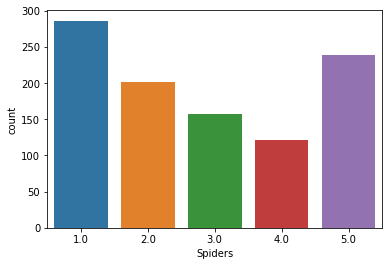

In [11]:
sns.countplot(x="Spiders", data=spider_survey)

### Adding a third variable with hue

This dataset contains one row for each table served at a restaurant and has information about things like the bill amount, how many people were at the table, and when the table was served.<br>
explore the relationship between the "total_bill" and "tip" columns

In [12]:
tips = sns.load_dataset("tips")
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

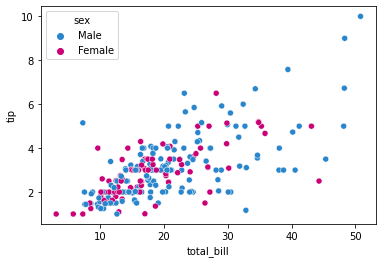

In [13]:
sns.scatterplot(x="total_bill",
                y="tip", 
                data=tips, 
                hue="sex", 
                hue_order =["Male", "Female"],
                palette={'Male': "#2986cc", 'Female': "#c90076"})

<AxesSubplot:xlabel='smoker', ylabel='count'>

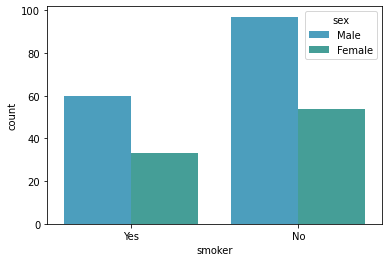

In [14]:
sns.countplot(x="smoker",
              data=tips,
              hue="sex",
              palette=["#39A7D0", "#36ADA4"])

# CHAPTER2: Introduction to relational plots and subplots
create and customize plots that visualize the relationship between two quantitative variables
- explore how the level of air pollution in a city changes over the course of a day.
- how horsepower relates to fuel efficiency in cars.

IMPORTANT: While looking at a relationship between two variables at a high level is often informative, sometimes we suspect that the relationship may be different within certain subgroups. 

In [15]:
tips.sex.unique()

['Female', 'Male']
Categories (2, object): ['Male', 'Female']

In [16]:
tips.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

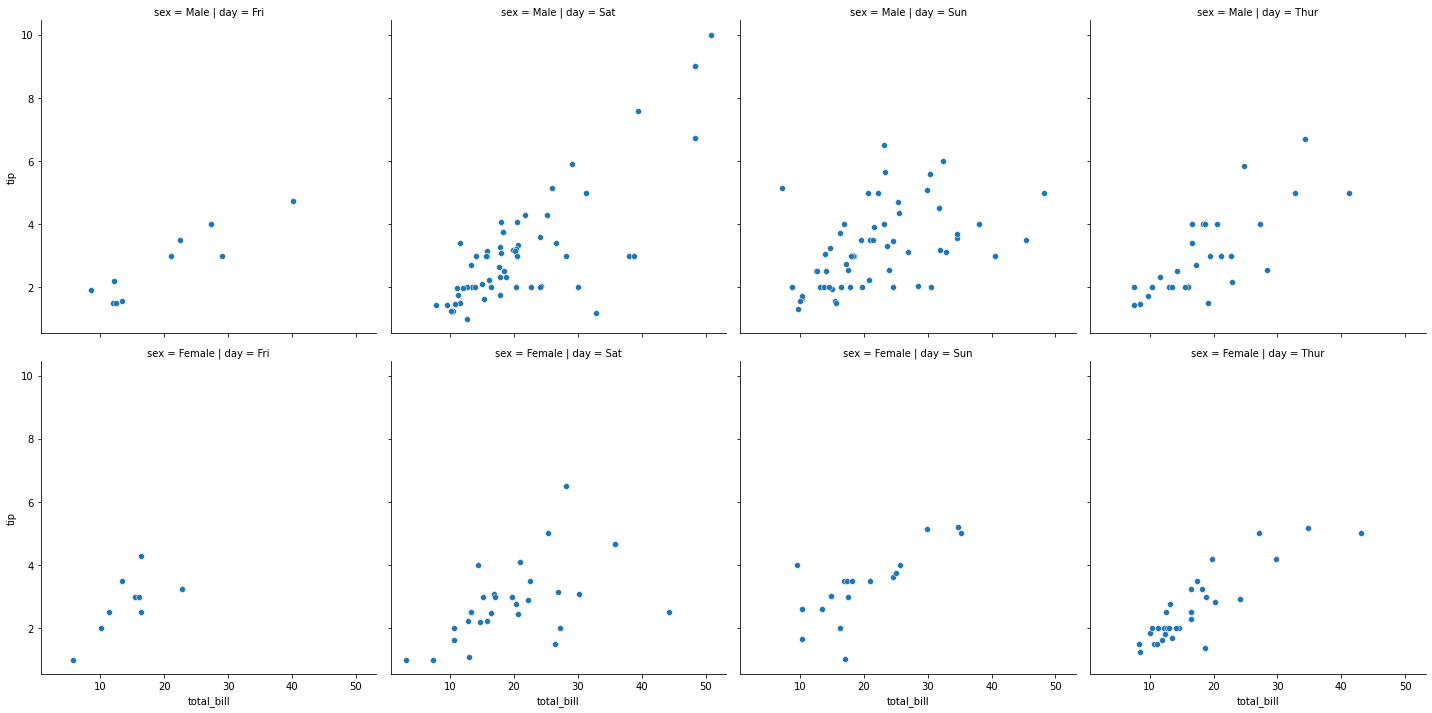

In [17]:
sns.relplot(x="total_bill", y="tip", 
            data=tips,
            kind="scatter", 
            col="day",
            col_order=['Fri', 'Sat', 'Sun', 'Thur'],
            row='sex',
            row_order=['Male', 'Female'])

### Customizing scatter plots

Deciding which customizations to use?

point size:
- varying point size is best used if the variable is either a quantitative variable or a categorical variable that represents different levels of something, like "small", "medium", and "large"
- This plot is a bit hard to read because all of the points are of the same color. We can make it easier by using the "size" parameter in combination with the "hue" parameter. because "size" is a quantitative variable, Seaborn will automatically color the points different shades of the same color instead of different colors per category value
point style:
- "style" equal to "smoker" allows us to better distinguish these subgroups by plotting smokers with a different point style in addition to a different color with "hue".
point transparency:
- ing the "alpha" parameter to a value between 0 and 1 will vary the transparency of the points in the plot, This customization can be useful when you have many overlapping points on the scatter plot, so you can see which areas of the plot have more or less observations.



# Explore Dataset
we'll explore Seaborn's mpg dataset, which contains one row per car model and includes information such as the year the car was made, the number of miles per gallon ("M.P.G.") it achieves, the power of its engine (measured in "horsepower"), and its country of origin.

In [18]:
miles_per_gallon = pd.read_csv('./data/mpg.csv')
miles_per_gallon.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320


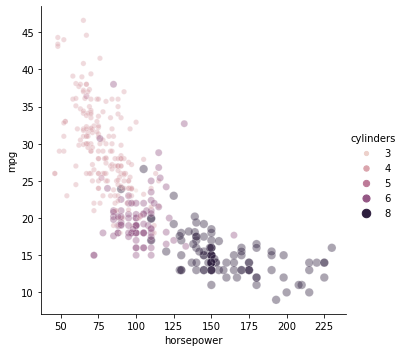

In [19]:
sns.relplot(
            x='horsepower',
            y='mpg',
            data=miles_per_gallon,
            kind='scatter',
            hue='cylinders',
            size='cylinders',
            alpha=0.4
            )

Cars with higher horsepower tend to get a lower number of miles per gallon. They also tend to have a higher number of cylinders.
<br>
<br>
<br>

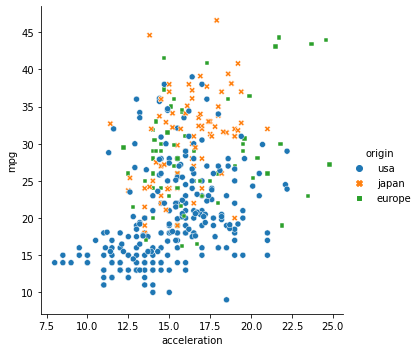

In [20]:
sns.relplot(x="acceleration",
            y="mpg", 
            data=miles_per_gallon,
            kind="scatter", 
            style="origin",
            hue="origin")

Looks good! Cars from the USA tend to accelerate more quickly and get lower miles per gallon compared to cars from Europe and Japan.
<br>
<br>
<br>


### Introduction to line plots
While each point in a scatter plot is assumed to be an independent observation, line plots are the visualization of choice when we need to track the same thing over time. A common example is tracking the value of a company's stock over time.

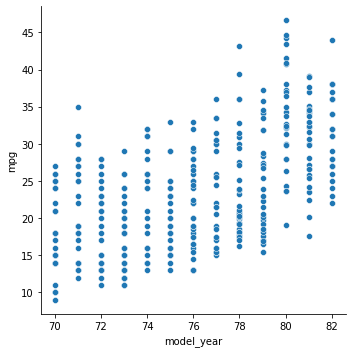

In [21]:
sns.relplot(x='model_year',
            y='mpg',
            data=miles_per_gallon,
            kind='scatter')

## We're tracking the same thing over time?
so a line plot would be a better choice.

### If a line plot is given multiple observations per x-value, it will aggregate them into a single summary measure. By default, it will display the mean. (can be replaced with standard deviation)

### Seaborn will automatically calculate a confidence interval for the mean, displayed by the shaded region.

## What is Confidence Interval? 
### Assuming the air collection stations were randomly placed throughout the city, this dataset is a random sample of the Temperature levels across the whole city. This confidence interval tells us that based on our sample, we can be 95% confident that the average Temperature level for the whole city is within this range. Confidence intervals indicate the uncertainty we have about what the true mean is for the whole city.

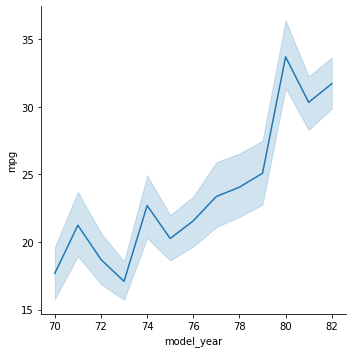

In [22]:
sns.relplot(x='model_year',
            y='mpg',
            data=miles_per_gallon,
            kind='line')

#### Question? The distribution of miles per gallon is smaller in 1973 compared to 1977?
This shaded Area Does Not represent The Distributions!


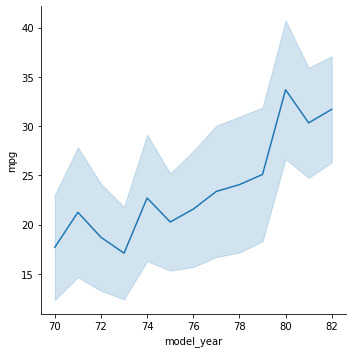

In [23]:
sns.relplot(x="model_year",
            y="mpg",
            data=miles_per_gallon, 
            kind="line",
            ci='sd')

### track subgroups over time with line plots


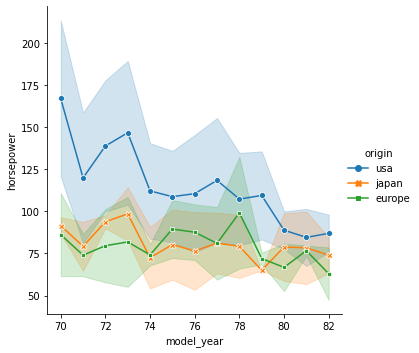

In [24]:
sns.relplot(x="model_year",
            y="horsepower", 
            data=miles_per_gallon,
            kind="line", 
            ci='sd',
            style="origin", 
            hue="origin",
            dashes=False,
            markers=True
           )

Now that we've added subgroups, we can see that this downward trend in horsepower was more pronounced among cars from the USA.
<br>
<br>
<br>


# CHAPTER3: Visualizing a Categorical and a Quantitative Variable
Categorical variables are present in nearly every dataset, but they are especially prominent in survey data.

Explore survey data from young people about their interests,<br> students about their study habits,<br> and adult men about their feelings about masculinity

In [25]:
survey_data = pd.read_csv('./data/young-people-survey-responses.csv')

survey_data['Age Category'] = survey_data['Age'].apply(lambda x: 'less than 21' if x < 21 else 'more than 21')
survey_data['Interested in Math'] = survey_data['Mathematics'].apply(lambda x: False if x <= 3.0 else True)

survey_data.head(2)

,Unnamed: 0,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Loneliness,Parents' advice,Internet usage,Finances,Age,Siblings,Gender,Village - town,Age Category,Interested in Math
0,0,5.0,1.0,5.0,1.0,3.0,4.0,1.0,3.0,4.0,few hours a day,3.0,20.0,1.0,female,village,less than 21,False
1,1,4.0,1.0,5.0,1.0,5.0,5.0,1.0,2.0,2.0,few hours a day,3.0,19.0,2.0,female,city,less than 21,True


### Count plots

In [26]:
survey_data['Mathematics'].unique()

array([ 3.,  5.,  4.,  2.,  1., nan])

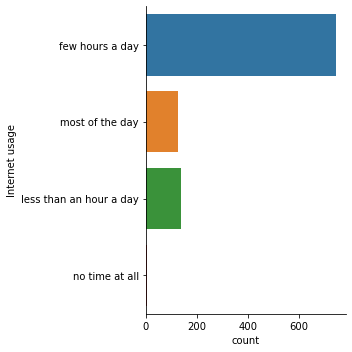

In [27]:
sns.catplot(
            #x='',
            y='Internet usage',
            data=survey_data,
            kind='count',
           )

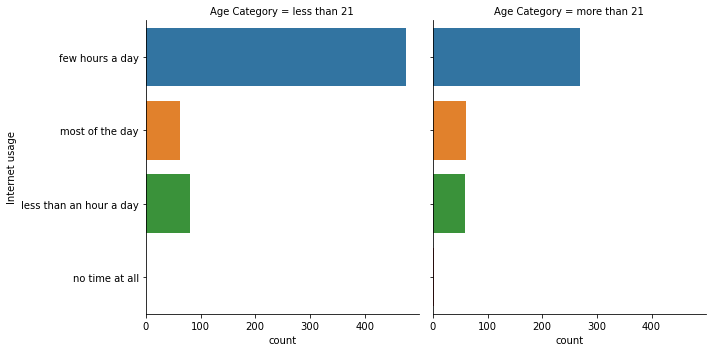

In [28]:
sns.catplot(
            #x='',
            y='Internet usage',
            data=survey_data,
            kind='count',
            col='Age Category'
           )

It looks like most young people use the internet for a few hours every day, regardless of their age.
<br>
<br>
<br>


### What percentage of young people report being interested in math, and does this vary based on gender?

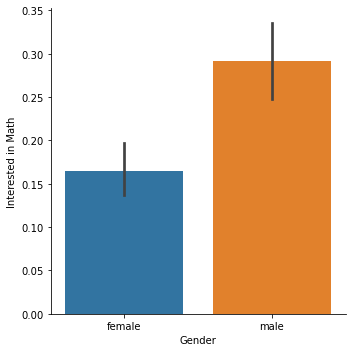

In [29]:
sns.catplot( x='Gender',
             y='Interested in Math',
             data=survey_data,
             kind='bar',
           )

When the y-variable is True/False, bar plots will show the percentage of responses reporting True. This plot shows us that males report a much higher interest in math compared to females.
<br>
<br>
<br>


In [30]:
student_data = pd.read_csv('./data/student-alcohol-consumption.csv')
student_data.head(2)

,Unnamed: 0,school,sex,age,famsize,Pstatus,Medu,Fedu,traveltime,failures,...,goout,Dalc,Walc,health,absences,G1,G2,G3,location,study_time
0,0,GP,F,18,GT3,A,4,4,2,0,...,4,1,1,3,6,5,6,6,Urban,2 to 5 hours
1,1,GP,F,17,GT3,T,1,1,1,0,...,3,1,1,3,4,5,5,6,Urban,2 to 5 hours


In [31]:
student_data.study_time.unique()

array(['2 to 5 hours', '5 to 10 hours', '<2 hours', '>10 hours'],
      dtype=object)

In [32]:
category_order = ["<2 hours", 
                  "2 to 5 hours", 
                  "5 to 10 hours", 
                  ">10 hours"]

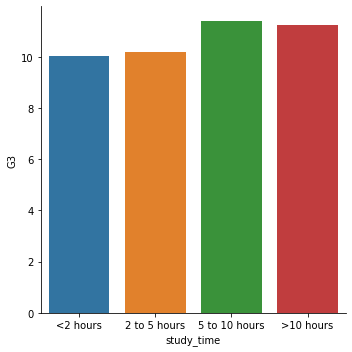

In [33]:
sns.catplot(x="study_time",
            y="G3",
            data=student_data,
            kind="bar",
            order=category_order,
            ci=None)

Students in our sample who studied more have a slightly higher average grade, but it's not a strong relationship.
<br>
<br>
<br>


### Box plots
shows the distribution of quantitative data. The colored box represents the 25th to 75th percentile, and the line in the middle of the box represents the median. The whiskers give a sense of the spread of the distribution, and the floating points represent outliers.


#### Box plots are commonly used as a way to compare the distribution of a quantitative variable across different groups of a categorical variable. This comparison would be much harder to do with other types of visualizations.

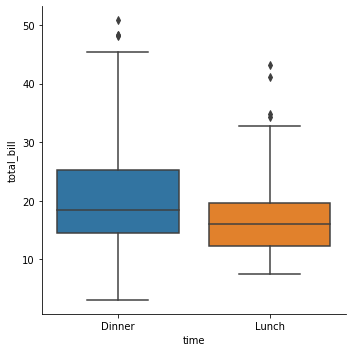

In [34]:
sns.catplot(
            x='time',
            y='total_bill',
            data=tips,
            kind='box',
            order=['Dinner', 'Lunch'],
            #sym="",   # remove the outlier or change its appearance
            whis=2.0   # makes whiskers boundries 2.0*IQR instaed of 1.5*IQR
           )
# "whis" param can take [1st percentile, 2nd percentile], foe EX [0, 100] set whiskers exactly on min and max value thus cover the entire Distribution

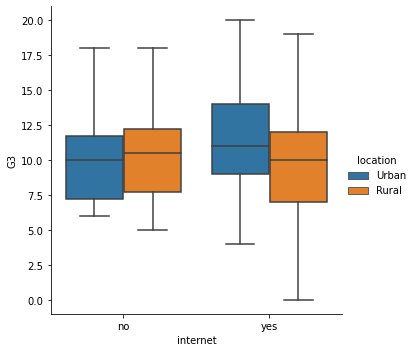

In [35]:
sns.catplot(x="internet",
            y="G3",
            data=student_data,
            kind="box",
            hue="location",
            sym=""    # hide outliers ""  
           )

### Point plots
Both line plots and point plots show the mean of a quantitative variable and 95% confidence intervals for the mean. However, there is a key difference. Line plots are relational plots, so both the x- and y-axis are quantitative variables. In a point plot, one axis - usually the x-axis - is a categorical variable, making it a categorical plot.


point plots seem to show the same information as bar plots. For each category, both show the mean of a quantitative variable and the confidence intervals for those means. When should we use one over the other?

- the point plot, it's easier to compare the heights of the subgroup points when they're stacked above each other.
- In the point plot, it's also easier to look at the differences in slope between the categories than it is to compare the heights of the bars between them.

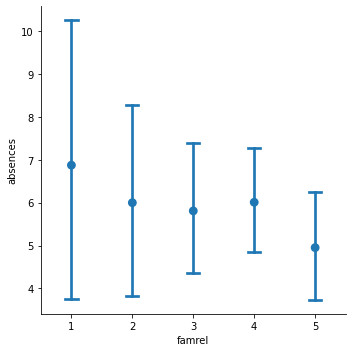

In [36]:
sns.catplot(x="famrel", # How high-quality family relationships are
            y="absences",
            data=student_data,
            kind="point",
            capsize=0.2,
            join=False)

Awesome! While the average number of absences is slightly smaller among students with higher-quality family relationships, the large confidence intervals tell us that we can't be sure there is an actual association here
<br>
<br>
<br>


### Question: Is being in a romantic relationship associated with higher or lower school attendance? And does this association differ by which school the students attend? 

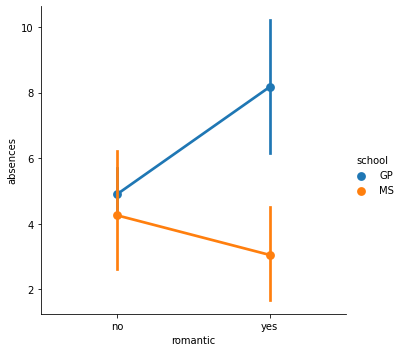

In [37]:
sns.catplot(x="romantic", 
            y="absences",
            data=student_data,
            kind="point",
            hue="school",
            #ci=None,
            #estimator=median
           )

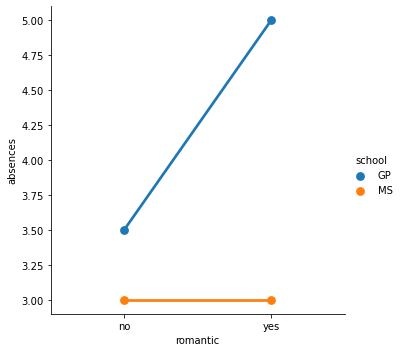

In [38]:
# Since there may be outliers of students with many absences, 
# people who never attends, display the median number of absences instead of the average.

import numpy as np
sns.catplot(x="romantic", 
            y="absences",
            data=student_data,
            kind="point",
            hue="school",
            ci=None,
            estimator=np.median
           )

Good work! It looks like students in romantic relationships have a higher average and median number of absences in the GP school, but this association does not hold for the MS school.
<br>
<br>
<br>


# CHAPTER4: Customizing Seaborn Plots
quickly orient your audience to the key takeaways

In [39]:
sns_styles = ['white', 'dark', 'whitegrid', 'darkgrid', 'ticks']

In [40]:
# diverging palettes -> Two Opposites and aa area in between ... Rate Happiness 1 to 5
sns_diverging_palettes = ['RdBu', 'RdBu_r', 'PRGn', 'PRGn_r']

In [41]:
# sequential Palettes -> single(blended) One color move from light to dark ... emphasizes a variable in Continous Scale
sns_sequential_palettes = ['Greys', 'Blues', 'PuRd', 'GnBu']

In [42]:
# Custom Palettes ? 
my_palette = ['red', 'green', 'blue']

In [43]:
# Changing The Scale
sns_scales = ['paper', 'notebook', 'talk', 'poster']

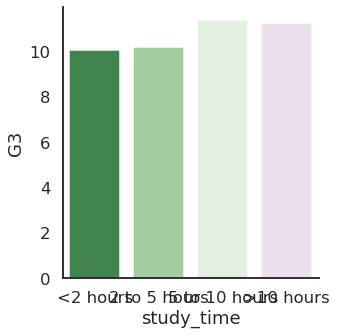

In [75]:
sns.set_style('white')
sns.set_palette('PRGn_r')
sns.set_context('talk')

sns.catplot(x="study_time",
            y="G3",
            data=student_data,
            kind="bar",
            order=category_order,
            ci=None)

### Visualizations to communicate information!
we can't do that effectively without a clear title and informative axis labels.

# underlying mechanism in Seaborn
Seaborn's plot functions create two different types of objects: 
- AxesSubplots -> single-type plot functions like "scatterplot()" and "countplot()" return a single AxesSubplot object.

* FacetGrids -> FacetGrid consists of one or more AxesSubplots,enables subplots like catplot(), and relplot() 


Text(0.5, 1.05, 'Car Weight vs. Horsepower')

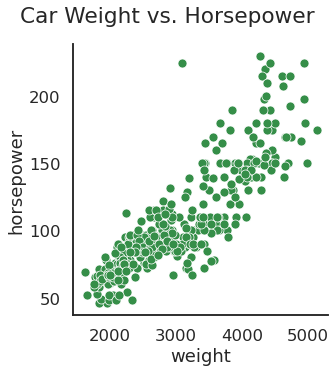

In [76]:
# # Create relational plot: FacetGrids
g = sns.relplot(x="weight", 
                y="horsepower", 
                data=miles_per_gallon,
                kind="scatter")

# Add a title "Average MPG Over Time"
g.fig.suptitle("Car Weight vs. Horsepower", 
               y=1.05
              )

# It looks like a car's weight is positively correlated with its horsepower.

[Text(0.5, 0, 'Car Model Year'), Text(0, 0.5, 'Average MPG')]

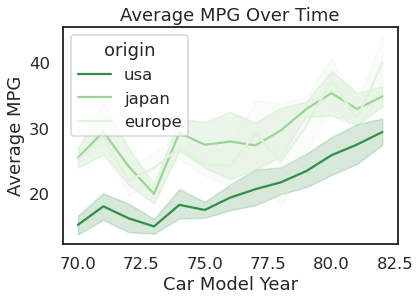

In [77]:
# Create line plot: AxesSubplots
g = sns.lineplot(x="model_year", y="mpg", 
                 data=miles_per_gallon,
                 hue="origin")

# Add a title "Average MPG Over Time"
g.set_title("Average MPG Over Time")

# Add x-axis and y-axis labels
g.set(
    xlabel='Car Model Year',
    ylabel='Average MPG'
)

### Rotate Overlapping X Labels? go back to Mother! matplotlib

(array([0, 1, 2]),
 [Text(0, 0, 'usa'), Text(1, 0, 'japan'), Text(2, 0, 'europe')])

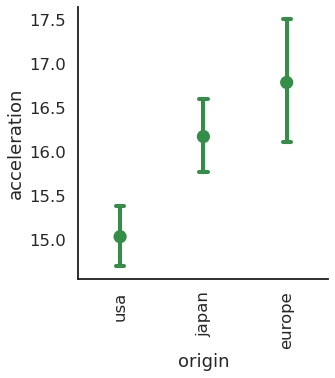

In [78]:
sns.catplot(x="origin", 
            y="acceleration", 
            data=miles_per_gallon, 
            kind="point", 
            join=False, 
            capsize=0.1)

plt.xticks(rotation=90)

# Since higher values indicate slower acceleration, it looks like cars from Japan and Europe have significantly slower acceleration compares to the USA.

### Putting it all together
form a cohesive picture of how to use Seaborn for future projects.


Text(0.5, 1.03, 'Age of Those Interested in Pets vs. Not')

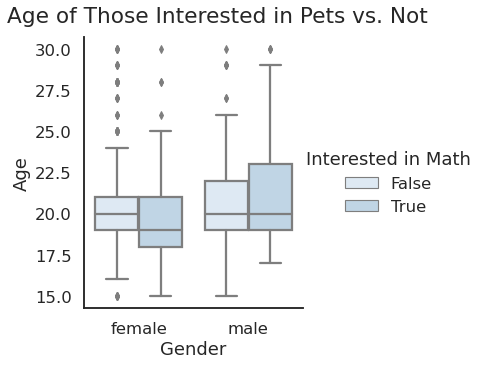

In [83]:
# Prior Customization
sns.set_palette("Blues")

g = sns.catplot(x="Gender",
                y="Age",
                data=survey_data, 
                kind="box",
                hue="Interested in Math")

# Final Touches
g.fig.suptitle("Age of Those Interested in Pets vs. Not",
              y=1.03
              )


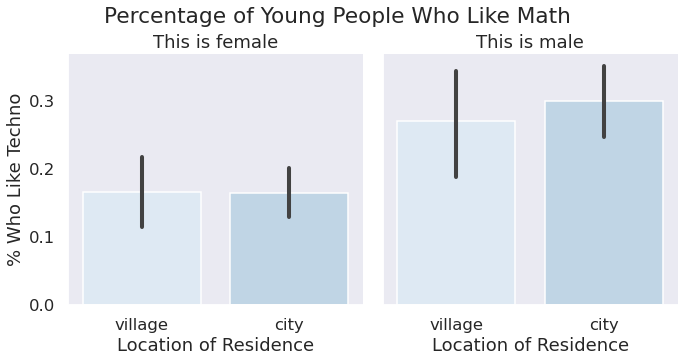

In [90]:
# Prior Customization
sns.set_style("dark")

# Adjust to add subplots per gender
g = sns.catplot(x="Village - town",
                y="Interested in Math", 
                data=survey_data,
                kind="bar",
                col="Gender")

# Final Touches
g.fig.suptitle("Percentage of Young People Who Like Math", 
               y=1.02
              )
g.set_titles('This is {col_name}') # set title to each subplot

g.set(xlabel="Location of Residence", 
      ylabel="% Who Like Techno")